# Toolkit_EX2_Hydrant_rating_curve
This example illustrates how the Toolkit could be used to develop a hydrant rating curve used in fire flow studies. 
This curve shows the amount of flow available at a node in the system as a function of pressure. 
The curve is generated by running a number of steady state hydraulic analyses with the node of interest subjected 
to a different demand in each analysis. For this example we assume that the ID label of the node of interest is MyNode 
and that N different demand levels stored in the array D need to be examined. The corresponding pressures will be stored in P.
To keep the code more readable, no error checking is made on the results returned from the Toolkit function calls.
  
https://github.com/OpenWaterAnalytics/EPANET/wiki/Example-2
  

In [1]:
from epyt import epanet

# Load a network
d = epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 0.0.1).
Input File Net1.inp loaded successfully.



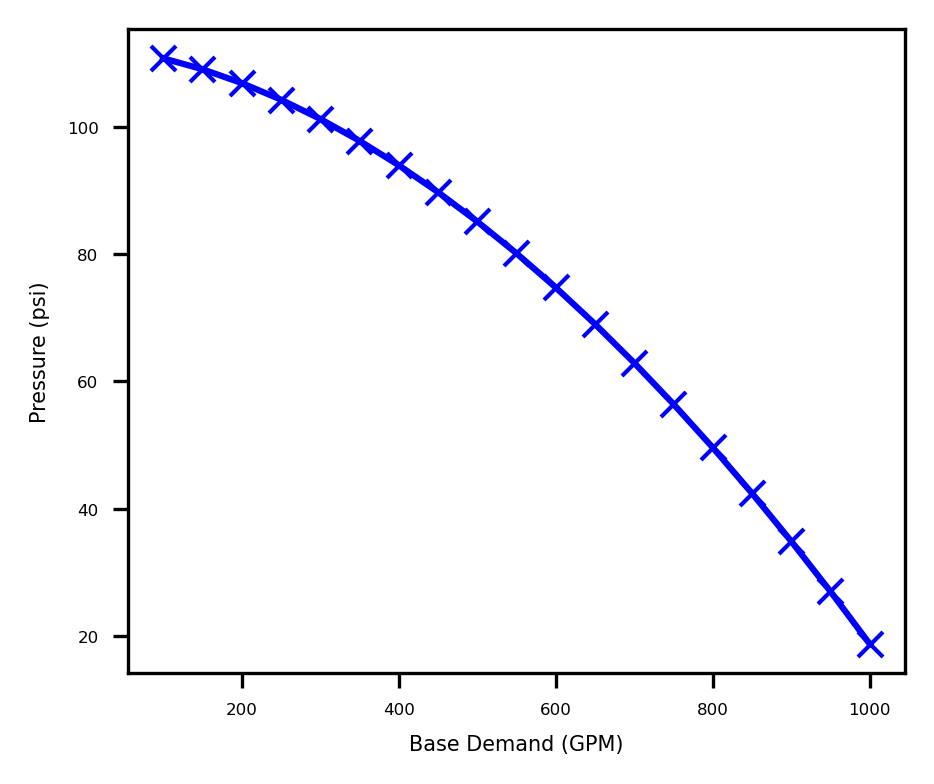

In [2]:
# Select node of interest
nodeID = '32'

# Select number of iterations
r = d.arange(1.0, 10.1, 0.5)

d.openHydraulicAnalysis()

nodeIndex = d.getNodeIndex(nodeID)

categoryIndex = 1
B = d.getNodeBaseDemands()[categoryIndex][nodeIndex-1]
D = [i * B for i in r]

P = []
for i in range(len(D)):
    d.setNodeBaseDemands(nodeIndex, D[i])
    d.initializeHydraulicAnalysis()
    d.runHydraulicAnalysis()
    P.append(d.getNodePressure(nodeIndex))

d.closeHydraulicAnalysis()

d.plot_ts(X=D, Y=P, xlabel='Base Demand (' + d.units.NodeDemandUnits + ')',
          ylabel='Pressure (' + d.units.NodePressureUnits + ')',
          marker='x', figure_size=[3, 2.5], constrained_layout=True)

In [3]:
# Unload library
d.unload()

Close toolkit for the input file "Net1". EPANET Toolkit is unloaded.

